# Breast Cancer Detection

## Section 0 - Data Preparation

The dataset usedin this project is publicly available and created by Dr. William  H. Wolberg, physician at the University of Wisconsin Hospital at Madison, Wisconsin, USA. Dr. Wolbeg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which uses curve fitting algorithm, to compute ten features from each one of the cells in the sample,than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.

## Section 1 - Data Exploration

In [26]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

#importing cancer dataset
df = pd.read_csv('data.csv')
x = df.iloc[:, 2:31].values
y = df.iloc[:, 2].values
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
type(x)

numpy.ndarray

In [28]:
print("Cancer data set dimensions: {}".format(df.shape))

Cancer data set dimensions: (569, 33)


# # # Missing or Null data points

In [29]:
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [30]:
# drop the column with all missing values
df = df.dropna(axis = 1)
df.head()
df.shape

(569, 32)

In [31]:
# get a count of the number of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<IPython.core.display.Javascript object>


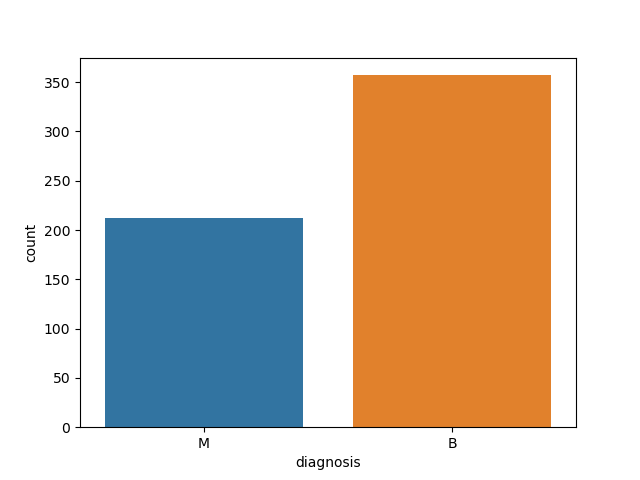

In [32]:
# visualize the count
sns.countplot(df['diagnosis'], label = 'Count')

## Section 2 - Categorical Data

In [33]:
# Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [34]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

<IPython.core.display.Javascript object>


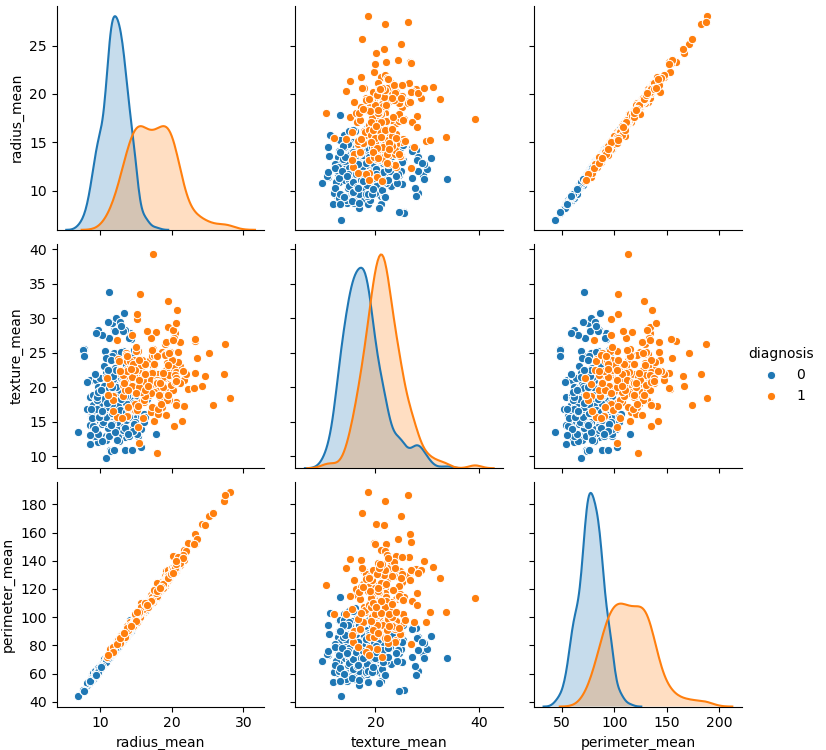

In [35]:
# create a pair plot
sns.pairplot(df.iloc[:,1:5], hue = 'diagnosis')


In [36]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
# get the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<IPython.core.display.Javascript object>


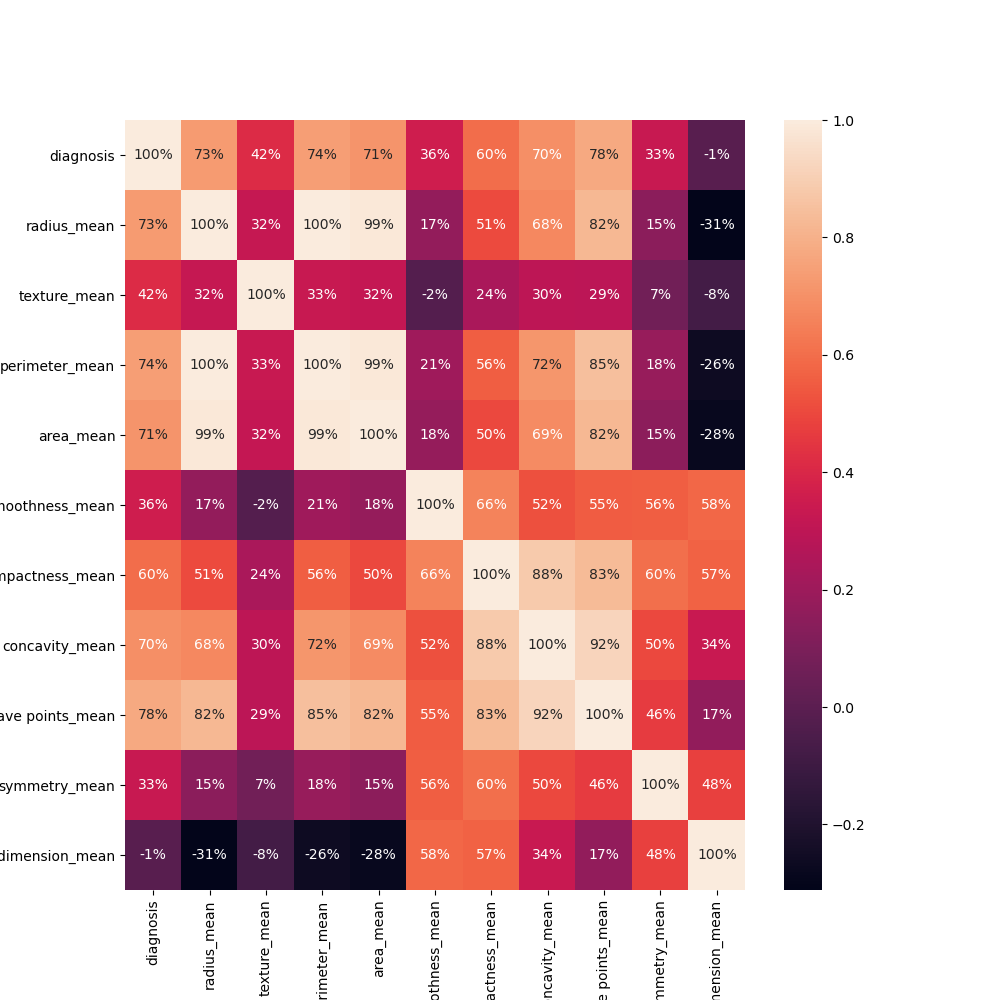

In [38]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[: ,1:12].corr(), annot=True, fmt='.0%')

In [39]:
# split the data set into independent, x and dependent, t data sets
x = df.iloc[:, 2:31].values
y = df.iloc[:, 2].values
x

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [40]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Section 3 - Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [42]:
y_train

array([10.05 , 10.8  , 16.14 , 12.18 , 12.25 , 13.28 , 11.74 , 12.67 ,
       14.22 , 11.27 , 20.2  , 11.62 , 14.34 , 11.29 , 10.26 , 10.86 ,
       18.01 , 10.08 , 13.2  , 13.11 , 11.3  , 11.54 , 14.74 , 15.05 ,
       23.21 , 10.51 , 12.34 , 13.53 , 19.59 , 11.85 , 11.22 , 20.13 ,
       13.59 , 16.69 , 12.06 , 13.87 , 12.56 , 14.26 ,  9.029, 13.46 ,
        9.876, 14.78 , 14.04 , 13.61 , 12.72 , 15.49 , 19.68 , 12.3  ,
       10.97 , 17.27 , 11.43 , 17.05 , 13.71 , 17.99 , 13.71 , 13.3  ,
        9.333, 11.49 , 10.49 , 12.25 , 18.31 ,  6.981,  9.787, 13.08 ,
       11.15 , 15.1  , 18.63 , 11.67 , 13.49 , 13.61 , 12.99 , 10.51 ,
       14.76 , 12.54 , 19.21 , 10.75 , 10.17 , 18.25 , 13.   , 10.88 ,
       10.25 , 19.73 , 23.29 , 13.2  , 13.64 , 14.99 , 12.87 , 10.26 ,
       17.35 , 23.51 , 19.4  , 11.33 , 12.21 ,  9.676, 20.59 , 13.37 ,
       13.15 , 12.18 ,  8.618, 11.25 , 23.09 , 10.96 , 20.92 , 14.53 ,
       17.29 , 13.66 , 12.83 , 11.52 , 13.43 , 12.62 , 13.75 , 12.06 ,
      

In [43]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.2190909 ,
         1.3893291 ,  1.08203284],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.64433168,
        -0.83369364, -0.73131577],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -1.02744655,
        -0.49483785, -1.22080864],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.32038567,
         1.57630515,  0.20317063],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.54362529,
         0.56019755,  0.26991966],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.41065167,
        -0.19383705, -1.15564888]])

## Section 4 - Model Selection

In [44]:
# create a function for the models
def models(x_train, y_train):
    
    # logistic regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state = 0)
    lr.fit(x_train, y_train)
    
    #K neighbors classifier
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knc.fit(x_train, y_train)
    
    # SVC
    from sklearn.svm import SVC
    svc = SVC(kernel = 'linear', random_state = 0)
    svc.fit(x_train, y_train)
    
    # SVC using kernel
    from sklearn.svm import SVC
    svcr = SVC(kernel = 'rbf', random_state = 0)
    svcr.fit(x_train, y_train)
    
    # gaussianNB
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
  
    
    # decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(x_train, y_train)
    
    # random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    forest.fit(x_train, y_train)
    
    # print the models accuracy
    print('[0]Logistic Regression Training Accuracy:', lr.score(x_train, y_train))
    print('[1]KNeighbor Classifier Training Accuracy:', knc.score(x_train, y_train))
    print('[2]SVC Training Accuracy:', svc.score(x_train, y_train))
    print('[3]SVC Using Kernel Training Accuracy:', svcr.score(x_train, y_train))
    print('[4]gaussianNB Training Accuracy:', gnb.score(x_train, y_train))
    print('[5]Decision tree Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random forest classifier Training Accuracy:', forest.score(x_train, y_train))
    
    return lr,knc, svc, svcr, gnb, tree, forest

In [45]:
# getting all of the models
x_train = x_train.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy: 0.589010989010989
[1]KNeighbor Classifier Training Accuracy: 0.4989010989010989
[2]SVC Training Accuracy: 0.6263736263736264
[3]SVC Using Kernel Training Accuracy: 0.567032967032967
[4]gaussianNB Training Accuracy: 0.4065934065934066
[5]Decision tree Training Accuracy: 0.8791208791208791
[6]Random forest classifier Training Accuracy: 0.865934065934066


/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model[0].predict(x_test))
print(cm)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 8 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 4 6 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 4 4 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 4 6 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 3 0 1 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 2 3 2 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 2 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [47]:
# Accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    print('Model', i)
    print(classification_report(y_test,model[i].predict(x_test)))
    print(accuracy_score(y_test, model[i].predict(x_test)))
    print()

/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/altair/anaconda3/lib/python3.8/si

Model 0
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
           8       0.50      0.17      0.25         6
           9       0.58      0.88      0.70         8
          10       0.67      0.67      0.67         3
          11       0.36      0.36      0.36        14
          12       0.17      0.29      0.21        14
          13       0.17      0.31      0.22        13
          14       0.14      0.07      0.10        14
          15       0.25      0.11      0.15         9
          16       0.00      0.00      0.00         8
          17       0.40      0.40      0.40         5
          18       0.40      0.40      0.40         5
          19       0.00      0.00      0.00         3
          20       0.40      0.29      0.33         7
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0

    accuracy      

/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/altair/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/altair/anaconda3/lib/python3.8/si

In [48]:
# print the prediction of Decision tree Classifier Model
pred = model[5].predict(x_test)
print(pred)
print()
print(y_test)

[12 15 13 11 11 12 11 12  7 10 14 11  9 13 14 13  9 18 19 20 12 13 12 11
 21 17 11 12 13 18 12 18 12 10  9 10 11 20 13 11 15  9 12 10 11 21  8 10
 11 12 18 16 18 11 12 12 13 10 12 21 14 17 11 13 15 11 21 17 20  9 12 13
 11 15 19 15  8 11 12  9 12 19 13 12 17 12 13  8 13 19  9 13 12 13  9 10
 16 10 12 11  8 13 13 10 20  9 17 11 13 12 13 19 19 15]

[13 13 14 14 13 11 12 11  7 10 14 14  9 16 14 15  9 20 19 20 11 16 13 11
 21 11 10 13 13 18 12 20 13 16  9 12 13 19 14 15 15  8 16 10 13 21  8 14
 11 14 19 14 18 11 12 11 11 12 12 21 13 16 11 12 17 12 22 17 20  9 14 16
 11 14 18 13  8 13 11  8 16 20 15 12 16 12 13  8 17 20  9 15 14 15  9  9
 15 12 11 11  8 12 14 14 18  9 17 12 15 17 12 20 18 15]
